In [27]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
import time
import sys

dyn_pendulum = {"g":9.81, "m": 1.0, "l": 1.0}
x0 = np.array([np.pi-0.1, 0.0])
v1 = np.array([1.0, 0.0])
v2 = np.array([0.0, 1.0])
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

# def cosin 

def simple_pendulum (x0, dyn):
    g = dyn['g'] 
    l = dyn['l']
    #print (x0)
    return np.array([x0[1], (-g/l)*np.sin(x0[0])])


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    # print ('x:', x)
    # print ('x[:, 0]:', x[:, 0])
    # print ('x0:', x0)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x


In [12]:
a = np.array([1.,2.,3.,4.,5.])
a[a==4] = np.inf


In [13]:
a

array([ 1.,  2.,  3., inf,  5.])

In [8]:
np.indices(len(a))

TypeError: 'int' object is not iterable

In [2]:
#find nearest neighbor

from scipy import spatial
import numpy as np



def pt_len_cal(index, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - nodes[index])**2, axis=1)
    return dist_2

def closest_node ( dist, scalmn, scalmx):
    dist[dist < scalmn] = np.inf
    dist[dist > scalmx] = np.inf
    return np.argmin(dist), dist[np.argmin(dist)]

def distance_candidates (dist, scalmn, scalmx):
    s = (dist<scalmx) & (dist>scalmn)
    indices = np.where(s)
    
    return indices

def min_angle_candidates (angles,  anglmx, indices):

    s = angles < anglmx
    angles[s] = np.inf
    
    for i in range(len(angles)):
        if i not in indices:
            angles[i] = np.inf
    cans = np.where(angles != np.inf)[0]
#     print ("angles:",angles)
    val = 0
#     print ("cans:", cans)
    if cans.size == 0:
        val = None
    else:
#         val = np.argmin(angles[indices])
        val = np.argmin(angles)
    
    return val

def angle_sep_cal(index1, index2, nodes):

    
    vectors = nodes - nodes[index1]
    vec_mag = np.array([np.linalg.norm(i) for i in vectors])
    v1 = vectors[index2]
    
    dot = np.clip(np.sum(v1*vectors, axis=1), -1.0, 1.0)
    v1_mag = vec_mag[index2]
    denominators = v1_mag * vec_mag

    angle_separations = np.arccos(dot/denominators)

    angle_separations[np.isnan(angle_separations)] = np.inf
    return angle_separations



In [28]:
x = f_t(dyn_pendulum, simple_pendulum, 0.001, np.array([ np.pi-0.1, 1e-5]), 5000)
x = x.T

In [29]:
x

array([[ 3.04159265e+00,  1.00000000e-05],
       [ 3.04159217e+00, -9.69367362e-04],
       [ 3.04159071e+00, -1.94874419e-03],
       ...,
       [ 2.80508046e+00,  1.00121274e+00],
       [ 2.80608006e+00,  9.97978136e-01],
       [ 2.80707642e+00,  9.94752780e-01]])

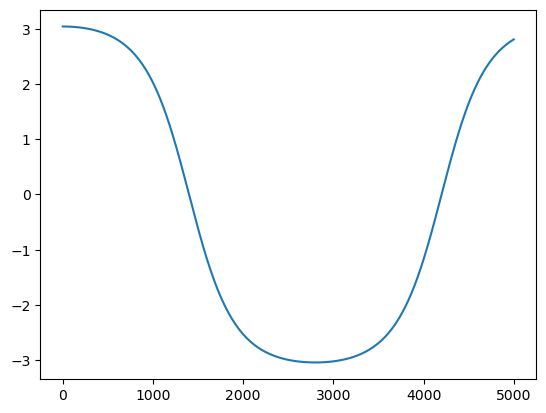

In [30]:
import matplotlib.pyplot as plt
import numpy as np


ypoints = np.arange(0, len(x))
plt.plot(ypoints, x.T[0])
plt.show() 

In [330]:
#H < H_boundary
x = f_t(dyn_pendulum, simple_pendulum, 0.001, np.array([ 3.4, -0.8]), 800)
x = x.T

In [359]:
#H < H_boundary 1
x = f_t(dyn_pendulum, simple_pendulum, 0.001, np.array([ 0. , -6.2]), 800)
x = x.T

In [374]:
#H >= H_boundary
x = f_t(dyn_pendulum, simple_pendulum, 0.001, np.array([3.2, 0.2]), 800)
x = x.T

In [367]:
#H > H_boundary 1
x = f_t(dyn_pendulum, simple_pendulum, 0.001, np.array([ 0. , -9.8]), 800)
x = x.T

In [375]:
dt = 0.001
evolv = 2000
evolv_real = int(evolv*dt)
init_index = 0
pt = x[init_index]

dists = pt_len_cal(init_index,x)

index, dist = closest_node(dists,1e-28, 0.5)

pt1 = x[0]
pt2 = x[index]
lya = []
m = 0

plot_points_1 = []
plot_points_2 = []
plot_points_1.append(pt1)
plot_points_2.append(pt2)

while init_index + evolv_real < len(x) and index + evolv_real < len(x):
    m = m + 1
    print ('m:',m)
    print ('init_index:',init_index)
    print ('index:',index)
    l0 = np.linalg.norm(pt1-pt2)
    init_index = init_index + evolv_real
    index = index + evolv_real
    pt1 = x[init_index]
    pt2 = x[index]
    
    plot_points_1.append(pt1)
    plot_points_2.append(pt2)
    
    lt = np.linalg.norm(pt1-pt2)
    lya.append(np.log(lt/l0))
    
    dists = pt_len_cal(init_index,x)
    angles = angle_sep_cal(init_index,index,x)
    angle_can = None
    i = 1
    anglmx = 0.3
    while angle_can == None:
        dist_can = distance_candidates (dists, 1e-28, np.linalg.norm(pt2-pt1)*i)
#         print ("dist_can", dist_can)
        angle_can = min_angle_candidates(angles, anglmx, dist_can[0])
        i = i+1
        print (angle_can)
        if i == 5:
            anglmx = anglmx*2
            i = 1
        if anglmx >= 3.14:
            angle_can = index
            break
    index = angle_can

m: 1
init_index: 0
index: 1
0
m: 2
init_index: 2
index: 0
56
m: 3
init_index: 4
index: 56
0
m: 4
init_index: 6
index: 0
92
m: 5
init_index: 8
index: 92
0
m: 6
init_index: 10
index: 0
116
m: 7
init_index: 12
index: 116
0
m: 8
init_index: 14
index: 0
135
m: 9
init_index: 16
index: 135
0
m: 10
init_index: 18
index: 0
151
m: 11
init_index: 20
index: 151
0
m: 12
init_index: 22
index: 0
165
m: 13
init_index: 24
index: 165
0
m: 14
init_index: 26
index: 0
177
m: 15
init_index: 28
index: 177
0
m: 16
init_index: 30
index: 0
189
m: 17
init_index: 32
index: 189
0
m: 18
init_index: 34
index: 0
200
m: 19
init_index: 36
index: 200
0
m: 20
init_index: 38
index: 0
209
m: 21
init_index: 40
index: 209
0
m: 22
init_index: 42
index: 0
219
m: 23
init_index: 44
index: 219
0
m: 24
init_index: 46
index: 0
228
m: 25
init_index: 48
index: 228
0
m: 26
init_index: 50
index: 0
236
m: 27
init_index: 52
index: 236
0
m: 28
init_index: 54
index: 0
244
m: 29
init_index: 56
index: 244
0
m: 30
init_index: 58
index: 0
252


/tmp/ipykernel_7101/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_7101/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)


306
m: 47
init_index: 92
index: 306
0
m: 48
init_index: 94
index: 0
312
m: 49
init_index: 96
index: 312
0
m: 50
init_index: 98
index: 0
317
m: 51
init_index: 100
index: 317
0
m: 52
init_index: 102
index: 0
323
m: 53
init_index: 104
index: 323
0
m: 54
init_index: 106
index: 0
329
m: 55
init_index: 108
index: 329
0
m: 56
init_index: 110
index: 0
334
m: 57
init_index: 112
index: 334
0
m: 58
init_index: 114
index: 0
340
m: 59
init_index: 116
index: 340
0
m: 60
init_index: 118
index: 0
345
m: 61
init_index: 120
index: 345
0
m: 62
init_index: 122
index: 0
350
m: 63
init_index: 124
index: 350
0
m: 64
init_index: 126
index: 0
355
m: 65
init_index: 128
index: 355
0
m: 66
init_index: 130
index: 0
360
m: 67
init_index: 132
index: 360
0
m: 68
init_index: 134
index: 0
365
m: 69
init_index: 136
index: 365
0
m: 70
init_index: 138
index: 0
370
m: 71
init_index: 140
index: 370
0
m: 72
init_index: 142
index: 0
375
m: 73
init_index: 144
index: 375
0
m: 74
init_index: 146
index: 0
380
m: 75
init_index: 14

309
m: 308
init_index: 614
index: 309
785
m: 309
init_index: 616
index: 785
306
m: 310
init_index: 618
index: 306
789
m: 311
init_index: 620
index: 789
304
m: 312
init_index: 622
index: 304
793
m: 313
init_index: 624
index: 793
301
m: 314
init_index: 626
index: 301
797
m: 315
init_index: 628
index: 797
299
m: 316
init_index: 630
index: 299
799


In [376]:
sum(lya)/ (m*dt)

23.178622765454023

In [377]:
plot_points_2 = np.array(plot_points_2).T

In [378]:
plot_points_1 = np.array(plot_points_1).T

In [379]:
import matplotlib.pyplot as plt
import numpy as np

plot_points_2
ypoints = np.arange(0, len(plot_points_2[0]))

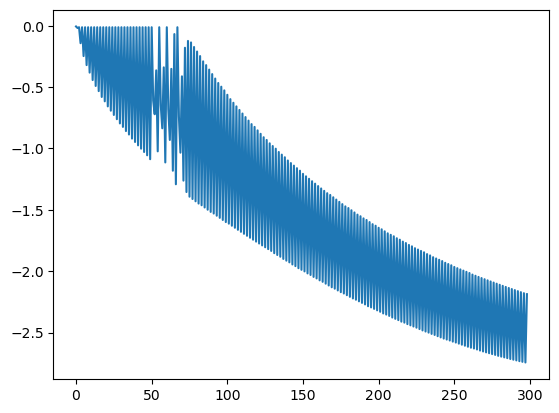

In [365]:
plt.plot(ypoints, plot_points_2[0])
plt.show() 

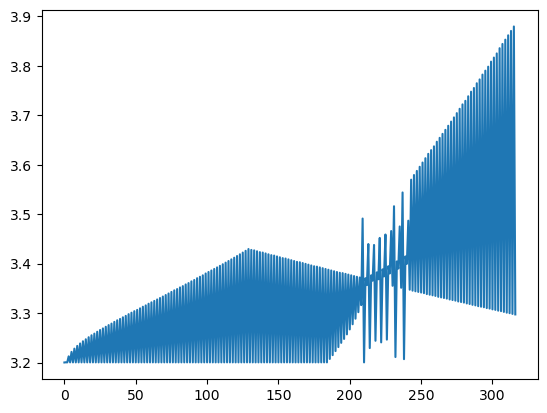

In [380]:
plt.plot(ypoints, plot_points_2[0])
plt.show() 

In [161]:
sum(lya)/ (m*dt)

91.64736795969627

In [3]:
def sample_based_le (x):
#     print (x)
    dt = 0.001
    evolv = 2000
    evolv_real = int(evolv*dt)
    init_index = 0
    pt = x[init_index]

    dists = pt_len_cal(init_index,x)

    index, dist = closest_node(dists,1e-28, 0.5)

    pt1 = x[0]
    pt2 = x[index]
    lya = []
    m = 0
#     print ('here')
    while init_index + evolv_real < len(x) and index + evolv_real < len(x):
        m = m + 1
        l0 = np.linalg.norm(pt1-pt2)
        init_index = init_index + evolv_real
        index = index + evolv_real
        pt1 = x[init_index]
        pt2 = x[index]
        lt = np.linalg.norm(pt1-pt2)
        lya.append(np.log(lt/l0))

        dists = pt_len_cal(init_index,x)
        angles = angle_sep_cal(init_index,index,x)
        angle_can = None
        i = 1
        anglmx = 0.3
        while angle_can == None:
            dist_can = distance_candidates (dists, 1e-28, np.linalg.norm(pt2-pt1)*i)
            angle_can = min_angle_candidates(angles, 0.3, dist_can[0])
            i = i+1
            if i == 5:
                anglmx = anglmx*2
                i = 1
            if anglmx >= 3.14:
                angle_can = index
                break
        index = angle_can
    return sum(lya)/ (m*dt)

In [94]:
sample_based_le (x)

/tmp/ipykernel_7101/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_7101/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)


8.634969820216606

In [126]:
T = 500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.2),
                      np.arange(-10 , 10, 0.2)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)

In [130]:
H=[]
for i in X_reshaped:
    H.append( i[1]**2 / 2 + 9.81/1 * (1 - np.cos(i[0])) )

In [134]:
H = np.array(H)

In [135]:
H.where()

array([50.        , 48.02      , 46.08      , ..., 44.21392203,
       46.11392203, 48.05392203])

In [132]:
H_boundary = 2* (9.81/1)

In [143]:
H_boundary

19.62

In [249]:
np.where(H < H_boundary)

(array([  19,   20,   21, ..., 3179, 3180, 3181]),)

In [269]:
H[21]

16.820000000000086

In [148]:
H[np.where(H < H_boundary)][657]

19.614290269204538

In [144]:
np.argmax(H[np.where(H < H_boundary)])

657

In [149]:
np.where(H == 19.614290269204538)

(array([1746]),)

In [358]:
X_reshaped[19]

array([ 0. , -6.2])

In [151]:
np.where(H > H_boundary)

(array([   0,    1,    2, ..., 3197, 3198, 3199]),)

In [152]:
np.argmin(H[np.where(H > H_boundary)])

994

In [238]:
np.sort(H[np.where(H > H_boundary)])

array([19.62327175, 19.62327175, 19.66262233, ..., 69.29429027,
       69.52182639, 69.60327175])

In [237]:
H[np.where(H > H_boundary)][994]

19.62327175054652

In [239]:
np.where(H == 19.66262233)

(array([], dtype=int64),)

In [366]:
X_reshaped[1]

array([ 0. , -9.8])

In [4]:
T = 800
X = np.array(np.meshgrid(np.arange(np.pi-2, np.pi+2, 0.1),
                      np.arange(0-2 , 0+2, 0.1)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
#     print(i)
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    
    cum_list.append(sample_based_le (x.T))
    
zs = np.array(cum_list)

/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_15553/420387687.py", line 12, in <module>
    cum_list.append(sample_based_le (x.T))
  File "/tmp/ipykernel_15553/710218153.py", line 35, in sample_based_le
    angle_can = min_angle_candidates(angles, 0.3, dist_can[0])
  File "/tmp/ipykernel_15553/2882910967.py", line -1, in min_angle_candidates
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/IPython/core/ult

In [120]:
zs

array([10.74976982, 10.80776019, 11.7293665 , ..., 12.45219219,
       11.98725825, 10.57487218])

In [121]:
np.argwhere(np.isnan(zs))

array([], shape=(0, 1), dtype=int64)

In [122]:
np.argmax(zs)

151

In [106]:
X_reshaped[1649]

array([ 3.2, -0.2])

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[1], 
                   c=zs, cmap=plt.cm.plasma,vmin=zs.min(), vmax=zs.max(), s=500, marker="s")
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle from the lowest point')
ax.set_ylabel('angular velocity')
plt.title ('le of simple pendulum, at T={}, +- [0,2pi] angle from the lowest point and +- 8 angular velocity'.format(T))

In [32]:
from concurrent.futures import ProcessPoolExecutor

def cal_le (x):
#     print (x)
    x_here = f_t(dyn_pendulum, simple_pendulum, 0.001, x, 800)
    le = sample_based_le (x_here.T)
    return le

T = 800
X = np.array(np.meshgrid(np.arange(0, 2*np.pi, 0.1),
                      np.arange(-10 , 10, 0.1)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
points = list(X_reshaped)
with ProcessPoolExecutor(max_workers=6) as executor:
    for r in executor.map(cal_le, points, chunksize=10):
        cum_list.append(r)
zs = np.array(cum_list)
np.save('pendulum_sample_01_800_pi', zs)
np.save('pendulum_points_01_800_pi', X_reshaped)

/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in divide
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykernel_15553/2882910967.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_separations = np.arccos(dot/denominators)
/tmp/ipykerne

In [61]:
points

[array([  0., -10.]),
 array([ 0. , -9.8]),
 array([ 0. , -9.6]),
 array([ 0. , -9.4]),
 array([ 0. , -9.2]),
 array([ 0., -9.]),
 array([ 0. , -8.8]),
 array([ 0. , -8.6]),
 array([ 0. , -8.4]),
 array([ 0. , -8.2]),
 array([ 0., -8.]),
 array([ 0. , -7.8]),
 array([ 0. , -7.6]),
 array([ 0. , -7.4]),
 array([ 0. , -7.2]),
 array([ 0., -7.]),
 array([ 0. , -6.8]),
 array([ 0. , -6.6]),
 array([ 0. , -6.4]),
 array([ 0. , -6.2]),
 array([ 0., -6.]),
 array([ 0. , -5.8]),
 array([ 0. , -5.6]),
 array([ 0. , -5.4]),
 array([ 0. , -5.2]),
 array([ 0., -5.]),
 array([ 0. , -4.8]),
 array([ 0. , -4.6]),
 array([ 0. , -4.4]),
 array([ 0. , -4.2]),
 array([ 0., -4.]),
 array([ 0. , -3.8]),
 array([ 0. , -3.6]),
 array([ 0. , -3.4]),
 array([ 0. , -3.2]),
 array([ 0., -3.]),
 array([ 0. , -2.8]),
 array([ 0. , -2.6]),
 array([ 0. , -2.4]),
 array([ 0. , -2.2]),
 array([ 0., -2.]),
 array([ 0. , -1.8]),
 array([ 0. , -1.6]),
 array([ 0. , -1.4]),
 array([ 0. , -1.2]),
 array([ 0., -1.]),
 array

In [80]:
def sample_based_truncated_le (x, evolv, dt, scalmx, scalmn):
    IND = 0
    SUM = 0.0
    ITS = 0
    IND2 = 0

    DI = np.inf #any large number

    NPT = len(x.T)
    DIM = len(x)
    DT = dt
    SCALMX = scalmx
    SCALMN = scalmn
#     EVOLV = 5 #time from t0 to t1
#     EVOLV_physical = EVOLV/DT
    
    EVOLV = evolv
    EVOLV_physical = evolv*DT
    #find nearest neighbor to the first data point
    Z = x.T
    
    for i in range(1, int(NPT)-(EVOLV)):
        D = 0.0
        #iterate through the array, compare first point with the rest
        D = np.linalg.norm(Z[IND] - Z[i])
        if ((D<DI) and (D>=SCALMN)):
            
            DI = D
            IND2 = i
            
    SUM_list = []
    while ((IND + EVOLV < NPT) and (IND2 + EVOLV < NPT)): #40
        PT1 = Z[IND+EVOLV]
        PT2 = Z[IND2+EVOLV]
        DF = np.linalg.norm(PT1 - PT2)
        ITS = ITS + 1
        SUM_list.append(SUM)
        SUM = SUM + np.log2(DF/DI) / EVOLV_physical
        ZLYAP = SUM/ITS

        INDOLD = IND2
        ZMULT = 1.0
        ANGLMX = 0.3
        THMIN = 3.14
        while (True): #70

            for i in range (int(NPT)): #100
                III = int(np.absolute(i-(IND+EVOLV)))
                if (III >= 10):
                    #find angular change old to new vector
                    DNEW = 0.0
                    DNEW = np.linalg.norm(PT1 - Z[i])
                    if ((DNEW <= ZMULT*SCALMX) and (DNEW >= SCALMN)):
                        DOT = 0.0
                        DOT = np.dot((PT1 - Z[i]),(PT1 - PT2))
                        CTH = np.absolute(DOT/(DNEW*DF))
                        #print(CTH)
                        if (CTH > 1.0):
                            CTH = 1.0
                        TH = np.arccos(CTH)
                        #save smallest angular change so far
                        if TH <= THMIN:
                            THMIN = TH
                            DII = DNEW
                            IND2 = i
            if (THMIN < ANGLMX):
                #print ("here")
                break
            # look at longer distance if cant find replacement
            ZMULT = ZMULT + 1
            if (ZMULT > 5):
                #no replacement at 5*scale, double search angle, reset distance
                ZMULT = 1.0
                ANGLMX = 2.0*ANGLMX
            if (ANGLMX >= 3.14):
                IND2 = INDOLD + EVOLV
                DII = DF
        IND = IND + EVOLV
        if (IND > NPT):
            print('here')
            break
#         print ("IND, IND2, NPT", IND, IND2, NPT)
        DI = DII
        
    return ZLYAP

In [20]:
T = 500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.1),
                      np.arange(-10 , 10, 0.1)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    cum_list.append(sample_based_truncated_le (x,100,0.001,10,1e-17))
    
zs = np.array(cum_list)

In [3]:
T = 500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.2),
                      np.arange(-8 , 8, 0.2)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    cum_list.append(sample_based_truncated_le (x,0.2,0.001,10,1e-17))
    
zs = np.array(cum_list)

TypeError: 'float' object cannot be interpreted as an integer

In [1]:
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.1),
                      np.arange(-10 , 10, 0.1)))

NameError: name 'np' is not defined

Text(0.5, 1.0, 'le of simple pendulum, at T=500, +- [0,2pi] angle from the lowest point and +- 8 angular velocity')

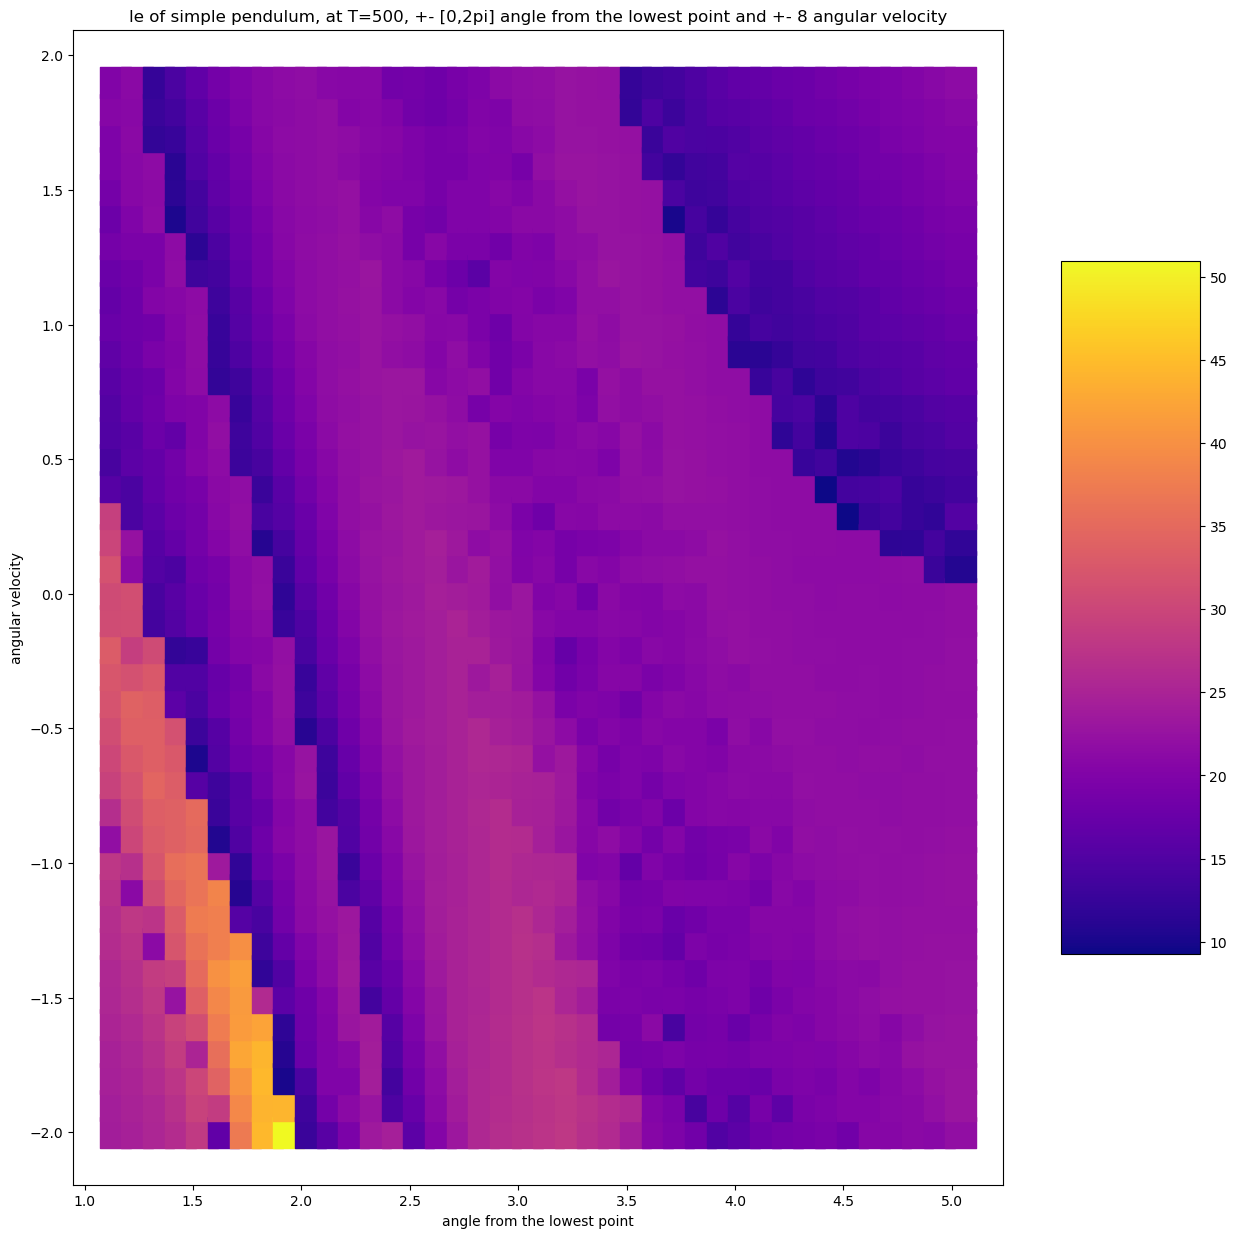

In [9]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[1], 
                   c=zs, cmap=plt.cm.plasma,vmin=zs.min(), vmax=zs.max(), s=500, marker="s")
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle from the lowest point')
ax.set_ylabel('angular velocity')
plt.title ('le of simple pendulum, at T={}, +- [0,2pi] angle from the lowest point and +- 8 angular velocity'.format(T))

In [22]:
np.save('pendulum_sample_01_500', zs)
np.save('pendulum_points_01_500', X_reshaped)

In [23]:
X.shape

(2, 200, 63)

In [ ]:
# non linear pattern, before it seems like a straight line
# limit velocity, clip velocity
# need to exent the plot above to see if theres non-linear pattern
# global max

In [ ]:
#maybe how i represent angles = shift angles
#maybe this doesnt work well for truncated le because of data distortion 
#why do we need to manipulate latern space data